**Design a Bayes classifier for classifying the numbers in the MNIST handwritten digit recognition databases Dataset link: http://yann.lecun.com/exdb/mnist/**

**(a) Design a classifier to distinguish between 0 and 1. Use the training database available for both to design the classifier.**

**(b) Use the testing database to compute the classification accuracy ((TP+TN)/ (TP+TN+FP+FN)) of the Bayesian model.**

**(c) Plot the ROC curves between FAR vs GAR.**

**(d) Repeat the above three parts for classifying the digits 3 and 8.**

**(e) Compare and contrast the results of the two classifiers**

The Colab notebook is available at following and to use make another copy of it.

> https://colab.research.google.com/drive/1bOALCt6bmGaW6xsUtBVd3nb09khj077u?usp=sharing

<h1>Tushant Yadav 2K18/EE/224<br>
Nishkarsh Sharma 2K18/PE/040<h1>

# 0/1 Classifier 


importing libraries

In [2]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib.image as image
import seaborn as sns
sns.set()
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
%matplotlib inline
plt.style.use('ggplot')

spliting dataset into training and test sets

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [66]:
train01 = []
train01_label = []
cnt = 0
for i in range(len(x_train)):
    if y_train[i] == 1 or y_train[i] == 0:
        cnt += 1
        train01.append(x_train[i])
        train01_label.append(y_train[i])

train01 = np.array(train01)
train01_label = np.array(train01_label)



In [67]:
test01 = []
test01_label = []
for i in range(len(x_test)):
    if y_test[i] == 1 or y_test[i] == 0:
        test01.append(x_test[i])
        test01_label.append(y_test[i])

test01 = np.array(test01)
test01_label = np.array(test01_label)
print(test01.shape)
print(test01_label.shape)


(2115, 28, 28)
(2115,)


In [68]:
def show_images():
    li = np.random.randint(low=1, high=1000, size=100)
    figure = plt.figure(figsize=(15, 20))
    for i in range(100):
        figure.add_subplot(10, 10, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(train01_label[li[i]], color='blue', fontsize=20)
        plt.imshow(train01[li[i]], cmap="hot")


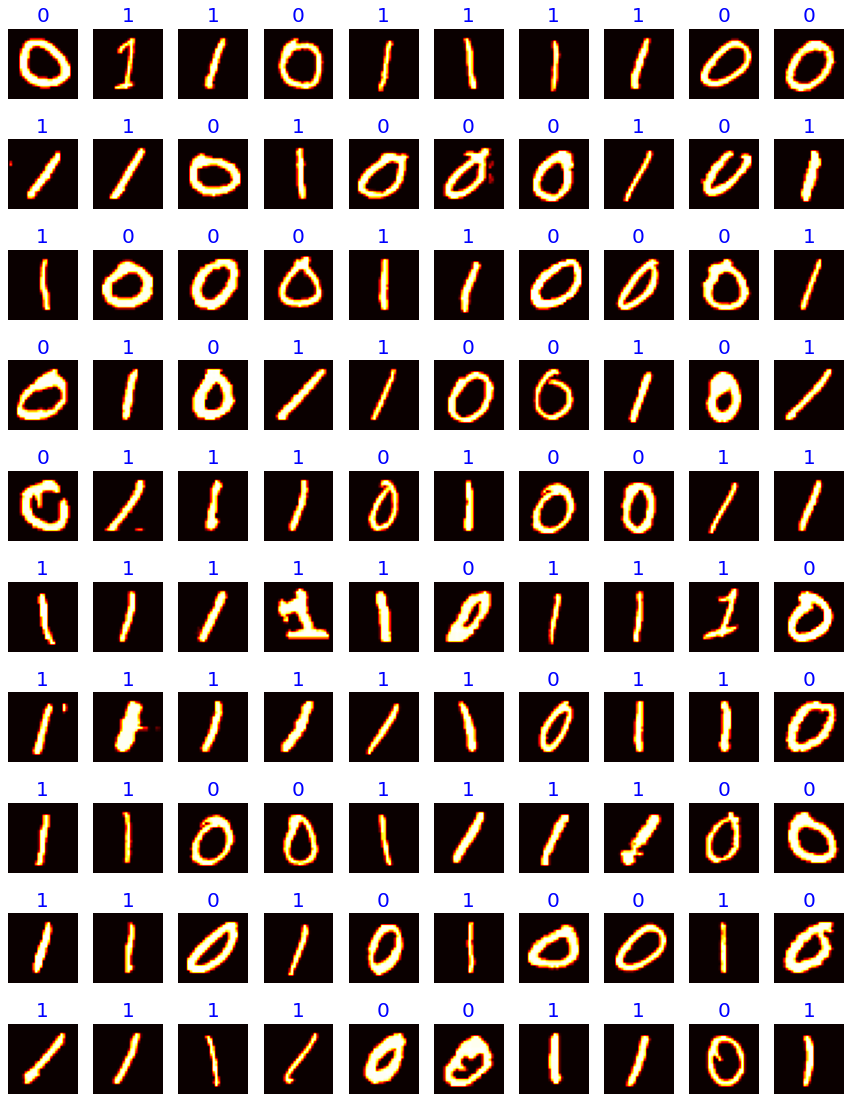

In [69]:
show_images()

In [70]:
train01 = train01.reshape(train01.shape[0], 28 * 28)
test01 = test01.reshape(test01.shape[0], 28 * 28)
print(train01.shape)
print(test01.shape)

model = GaussianNB()
model.fit(train01, train01_label)


(12665, 784)
(2115, 784)


GaussianNB(priors=None, var_smoothing=1e-09)

Train accuracy and Confusion Matrix for 0 vs 1


Classification accuracy: 0.9853138570864588


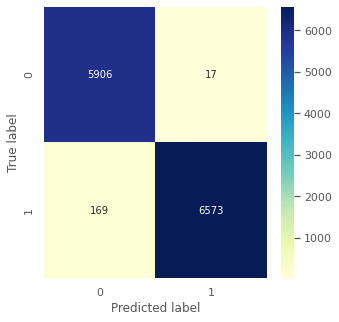

In [71]:


yhat_train = model.predict(train01)
cm = confusion_matrix(train01_label, yhat_train)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm, annot=True, fmt="d",cmap="YlGnBu")
plt.ylabel('True label')
plt.xlabel('Predicted label')

acc = accuracy_score(train01_label, yhat_train)
print(f"Classification accuracy: {acc}")


Test accuracy and Confusion Matrix for 0 vs 1


Classification accuracy: 0.9877068557919622


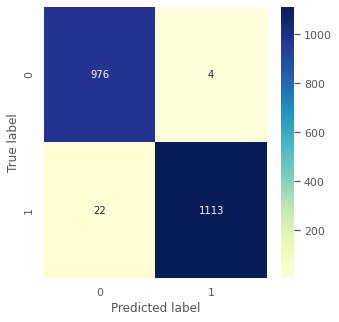

In [72]:

yhat = model.predict(test01)
cm = confusion_matrix(test01_label, yhat)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm, annot=True, fmt="d",cmap="YlGnBu")
plt.ylabel('True label')
plt.xlabel('Predicted label')

acc = accuracy_score(test01_label, yhat)
print(f"Classification accuracy: {acc}")


calculate the fpr and tpr for all thresholds of the classification


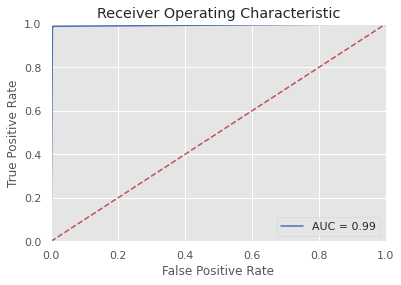

In [81]:
probs = model.predict_proba(test01)
preds = probs[:, 1]
fpr, tpr, threshold = metrics.roc_curve(test01_label, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



#3 vs 8 Classifier

In [74]:
train38 = []
train38_label= []
cnt = 0
for i in range(len(x_train)):
    if y_train[i] == 3 or y_train[i] == 8:
        cnt += 1
        train38.append(x_train[i])
        train38_label.append(y_train[i])

train38 = np.array(train38)
train38_label = np.array(train38_label)


In [75]:
test38 = []
test38_label= []
for i in range(len(x_test)):
    if y_test[i] == 3 or y_test[i] == 8:
        test38.append(x_test[i])
        test38_label.append(y_test[i])

test38 = np.array(test38)
test38_label = np.array(test38_label)
print(test38.shape)
print(test38_label.shape)

(1984, 28, 28)
(1984,)


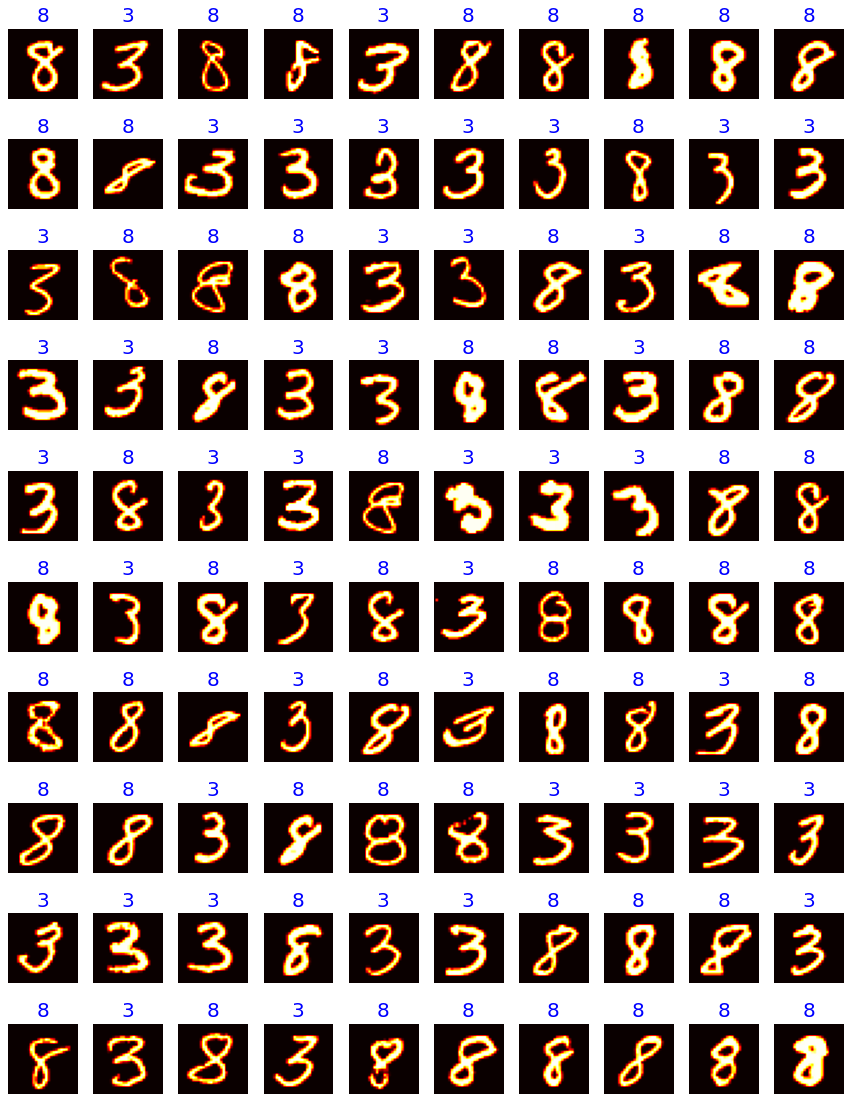

In [76]:
def show_images():
    li = np.random.randint(low=1, high=1000, size=100)
    figure = plt.figure(figsize=(15, 20))
    for i in range(100):
        figure.add_subplot(10, 10, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(train38_label[li[i]], color='blue', fontsize=20)
        plt.imshow(train38[li[i]], cmap="hot")


show_images()

In [77]:
train38 = train38.reshape(train38.shape[0], 28 * 28)
test38 = test38.reshape(test38.shape[0], 28 * 28)
print(train38.shape)
print(train38_label.shape)




(11982, 784)
(11982,)


Training accuracy and Confusion Matrix for 3 vs 8


Classification accuracy: 0.813970956434652


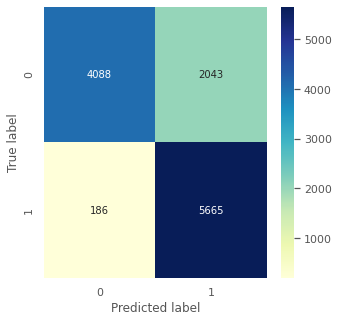

In [78]:
model_2 = GaussianNB(var_smoothing=1e-05)
model_2.fit( train38, train38_label)


yhat_train = model_2.predict(train38)
cm = confusion_matrix(train38_label, yhat_train)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm, annot=True, fmt="d",cmap="YlGnBu")
plt.ylabel('True label')
plt.xlabel('Predicted label')

acc = accuracy_score(train38_label, yhat_train)
print(f"Classification accuracy: {acc}")


Test accuracy and Confusion Matrix for 3 vs 8


Classification accuracy: 0.813970956434652


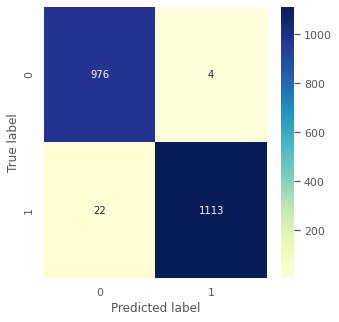

In [79]:
yhat = model.predict(test01)
cm = confusion_matrix(test01_label, yhat)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm, annot=True, fmt="d",cmap="YlGnBu")
plt.ylabel('True label')
plt.xlabel('Predicted label')

accuracy = accuracy_score(test01_label, yhat)
print(f"Classification accuracy: {acc}")



calculate the fpr and tpr for all thresholds of the classification


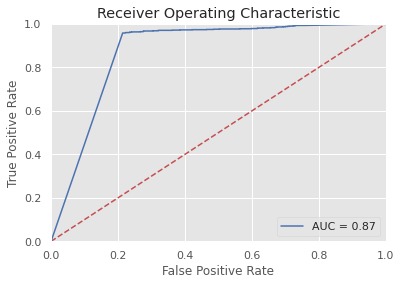

In [83]:
probs = model_2.predict_proba(test38)
preds = probs[:, 1]
test_three_eight_label_01 = [0 if i == 3 else 1 for i in test38_label]
fpr, tpr, threshold = metrics.roc_curve(test_three_eight_label_01, preds)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


<h3>References:<h3>
<p>

1. How to Use ROC Curves and Precision-Recall Curves for Classification in Python

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

2. How to plot Receiver Operating Characteristic (ROC) curve to check performance of the Classifier?

https://www.researchgate.net/post/How-to-plot-Receiver-Operating-Characteristic-ROC-curve-to-check-performance-of-the-Classifier#:~:text=and%20ROC%20curve%20is%20given,Cite


3. Naive Bayes for Machine Learning

https://classroom.google.com/u/1/c/MTk1ODY2OTcyNTQw

https://machinelearningmastery.com/naive-bayes-for-machine-learning/#:~:text=This%20extension%20of%20naive%20Bayes,deviation%20from%20your%20training%20data.

https://www.geeksforgeeks.org/naive-bayes-classifiers/

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

4. API Reference

https://scikit-learn.org/stable/modules/classes.html